# Regresión logística para predicciones bancarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../datasets/bank/bank.csv",sep=";")

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
data.shape

(4119, 21)

In [5]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

Principalmente son muchos variables que nos dicen caracteristicas de clientes que les estaban vendiendo un producto y al final en la variable "y", sabemos si el cliente compro o no el producto

In [6]:
data["y"]=(data["y"]=="yes").astype(int)  # yes=1 no=0

In [7]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0


**Generalmente el nivel de educacion influye mucho al comprar un producto bancario, debido a la formación y conocimiento que tengas de este**

In [8]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [9]:
data["education"] = np.where(data["education"]=="basic.4y","Basic",data["education"]) 
data["education"] = np.where(data["education"]=="basic.6y","Basic",data["education"]) 
data["education"] = np.where(data["education"]=="basic.9y","Basic",data["education"])

##Los demas datos los dejamos más bonitos
data["education"] = np.where(data["education"]=="high.school","High School",data["education"])
data["education"] = np.where(data["education"]=="professional.course","Professional Course",data["education"])
data["education"] = np.where(data["education"]=="university.degree","University Degree",data["education"]) 

data["education"] = np.where(data["education"]=="unknown","Unknown",data["education"]) 
data["education"] = np.where(data["education"]=="illiterate","Illiterate",data["education"]) 

**Nos dimos cuenta que hay muchas educaciones basicas, por lo que las agrupamos. 
En concreto el comando utilizado nos dice que:
donde vea en la columna "education" el valor "basic.4y" lo cambie por , "Basic", y si no lo ve que deje el valor por defecto que estaba data["education"]**

In [10]:
data["education"].unique()  ##ahora tenemos 6 categorias

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [11]:
##Realizamos un análisis exploratorio de la variable más importante, y, veamos cuanta gente compro y cuanta no
data["y"].value_counts()  #3668 no compraron y 451 si compraron

0    3668
1     451
Name: y, dtype: int64

**veamos ahora una panoramica de las variables en funcion de si compran o no. con groupy 
solo funciona para varibales numericas**

In [12]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [13]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frecuencia')

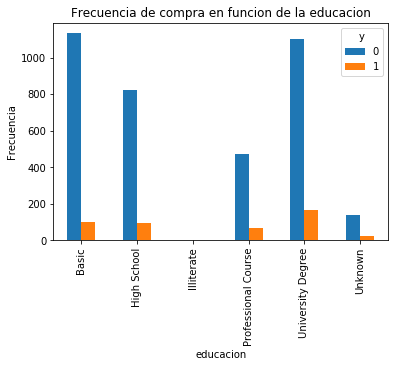

In [14]:
%matplotlib inline
pd.crosstab(data.education,data.y).plot(kind="bar")
plt.title("Frecuencia de compra en funcion de la educacion")
plt.xlabel("educacion")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'frecuencia de compras')

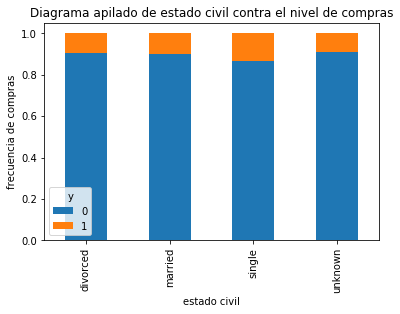

In [15]:
table = pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("estado civil")
plt.ylabel("frecuencia de compras")

Text(0, 0.5, 'Frecuencia')

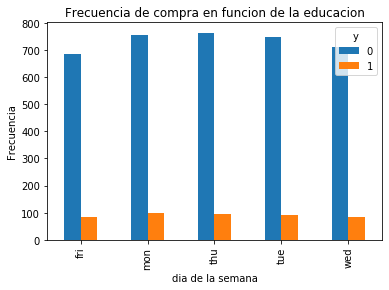

In [16]:
%matplotlib inline
pd.crosstab(data.day_of_week,data.y).plot(kind="bar")
plt.title("Frecuencia de compra en funcion de la educacion")
plt.xlabel("dia de la semana")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

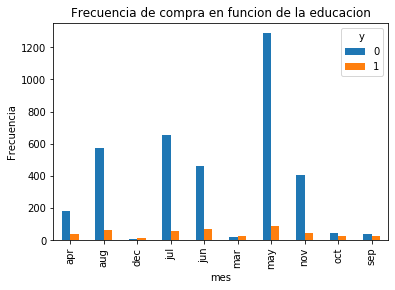

In [17]:
%matplotlib inline
pd.crosstab(data.month,data.y).plot(kind="bar")
plt.title("Frecuencia de compra en funcion de la educacion")
plt.xlabel("mes")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

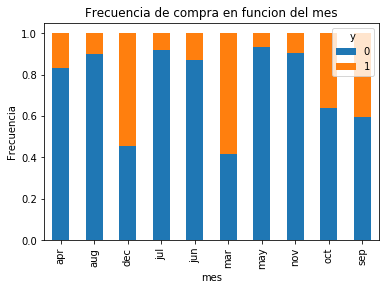

In [18]:
%matplotlib inline
table= pd.crosstab(data.month,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.title("Frecuencia de compra en funcion del mes")
plt.xlabel("mes")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

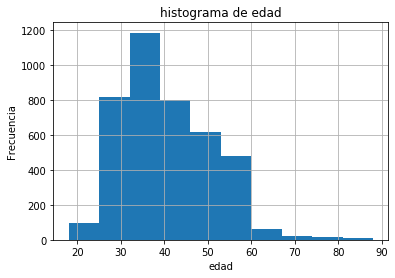

In [19]:
%matplotlib inline
data.age.hist()
plt.title("histograma de edad")
plt.xlabel("edad")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

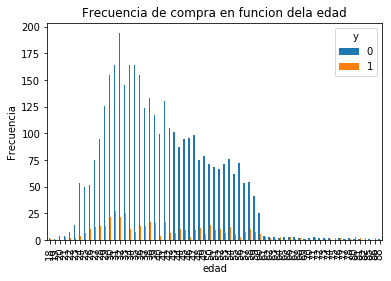

In [20]:
%matplotlib inline
table= pd.crosstab(data.age,data.y).plot(kind="bar")
plt.title("Frecuencia de compra en funcion dela edad")
plt.xlabel("edad")
plt.ylabel("Frecuencia")

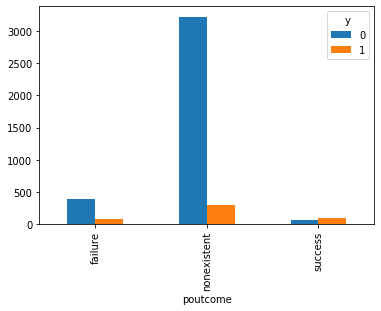

In [21]:
## veamos los que ya han tenido experiencia pasada en compras
pd.crosstab(data.poutcome,data.y).plot(kind="bar")

Text(0, 0.5, 'Frecuencia')

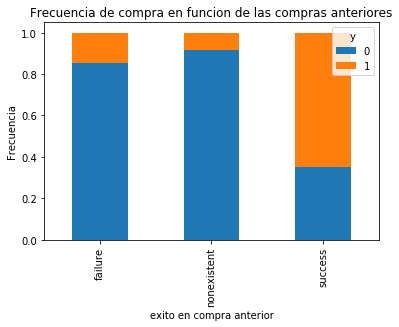

In [22]:
%matplotlib inline
table= pd.crosstab(data.poutcome,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.title("Frecuencia de compra en funcion de las compras anteriores")
plt.xlabel("exito en compra anterior")
plt.ylabel("Frecuencia")

# Conversión de variables categoricas a dummies

In [23]:
categories = ["job", "marital","education","housing","loan","contact","month","day_of_week","poutcome"]

In [24]:
for category in categories:
    prefix_list = "cat"+"_"+category   #será el prefijo
    cat_dummies = pd.get_dummies(data[category],prefix=prefix_list)
    data_new = data.join(cat_dummies)
    data = data_new

In [25]:
data_vars=data.columns.values.tolist()
len(data_vars)

69

In [26]:
## ahora eliminamos las categorias iniciales
to_keep = [v for v in data_vars if v not in categories]
to_keep = [v for v in to_keep if v not in "default"]
len(to_keep)

59

In [27]:
bank_data = data[to_keep]
bank_data.columns.values
bank_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,cat_month_oct,cat_month_sep,cat_day_of_week_fri,cat_day_of_week_mon,cat_day_of_week_thu,cat_day_of_week_tue,cat_day_of_week_wed,cat_poutcome_failure,cat_poutcome_nonexistent,cat_poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,0


In [28]:
bank_data_vars = bank_data.columns.values.tolist()
y=["y"]
x= [v for v in bank_data_vars if v not in y]

# Seleccion de rasgos para el modelo

In [29]:
n = 12 ##numero de variables

In [30]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model  import LogisticRegression

In [34]:
lr = LogisticRegression( max_iter = int( 1e6 ) )

In [35]:
rfe = RFE(lr,n)

In [36]:
rfe = rfe.fit(bank_data[x],bank_data[y].values.ravel())

In [37]:
print(rfe.support_)

[False False False False  True False False False  True False False False
  True False  True False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False  True False False  True  True  True
 False False False False False False False  True False  True]


In [38]:
print(rfe.ranking_)

[38 44 22 46  1 19 29 25  1 43 36  4  1 12  1 39  1  6 37 26 18  8 23 40
 34 45 20 13  7 47 27 41 10 24 28 14 17 35  9  3  1  5  1 42  2  1  1  1
 15 21 33 30 32 31 11  1 16  1]


In [78]:
## veamos cuales son las variables que se quedaran
z= zip(bank_data_vars,rfe.support_,rfe.ranking_)
z= list(z)
z

[('age', False, 38),
 ('duration', False, 44),
 ('campaign', False, 22),
 ('pdays', False, 46),
 ('previous', True, 1),
 ('emp.var.rate', False, 19),
 ('cons.price.idx', False, 29),
 ('cons.conf.idx', False, 25),
 ('euribor3m', True, 1),
 ('nr.employed', False, 43),
 ('y', False, 36),
 ('cat_job_admin.', False, 4),
 ('cat_job_blue-collar', True, 1),
 ('cat_job_entrepreneur', False, 12),
 ('cat_job_housemaid', True, 1),
 ('cat_job_management', False, 39),
 ('cat_job_retired', True, 1),
 ('cat_job_self-employed', False, 6),
 ('cat_job_services', False, 37),
 ('cat_job_student', False, 26),
 ('cat_job_technician', False, 18),
 ('cat_job_unemployed', False, 8),
 ('cat_job_unknown', False, 23),
 ('cat_marital_divorced', False, 40),
 ('cat_marital_married', False, 34),
 ('cat_marital_single', False, 45),
 ('cat_marital_unknown', False, 20),
 ('cat_education_Basic', False, 13),
 ('cat_education_High School', False, 7),
 ('cat_education_Illiterate', False, 47),
 ('cat_education_Professional Co

In [79]:
cols=[]
for i in z:
    if(i[1]==True):
        cols.append(i[0])
print(len(cols))
print(cols)

12
['previous', 'euribor3m', 'cat_job_blue-collar', 'cat_job_housemaid', 'cat_job_retired', 'cat_contact_telephone', 'cat_month_aug', 'cat_month_jun', 'cat_month_mar', 'cat_month_may', 'cat_day_of_week_wed', 'cat_poutcome_nonexistent']


In [80]:
len(cols)

12

In [81]:
x = bank_data[cols]
y = bank_data["y"]

## Implementación del modelo en Python con statmodel.api

In [82]:
import statsmodels.api as sm

In [83]:
logit_model = sm.Logit(y,x)

In [84]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.287494
         Iterations 7


In [85]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
=========================================================================
Model:                  Logit              Pseudo R-squared:   0.168     
Dependent Variable:     y                  AIC:                2392.3715 
Date:                   2020-04-09 19:23   BIC:                2468.2519 
No. Observations:       4119               Log-Likelihood:     -1184.2   
Df Model:               11                 LL-Null:            -1422.9   
Df Residuals:           4107               LLR p-value:        2.0339e-95
Converged:              1.0000             Scale:              1.0000    
No. Iterations:         7.0000                                           
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
previous                  0.1193   0.0701   1.7014 0.0889 -0.0181  0.2567
euribor3m                -0.5269   0.0351 -15.0109 0.0000 -0.5956 -0.4581
cat_job_blue-collar      -0.3491   0.1546  -2.2581 0.0239 -0.6520 -0.0461
cat_job_housemaid         0.0257   0.3475   0.0739 0.9411 -0.6554  0.7068
cat_job_retired           0.1837   0.2173   0.8453 0.3979 -0.2422  0.6095
cat_contact_telephone    -0.2162   0.1603  -1.3487 0.1774 -0.5305  0.0980
cat_month_aug            -0.0741   0.1666  -0.4449 0.6564 -0.4006  0.2524
cat_month_jun             0.4615   0.1781   2.5916 0.0096  0.1125  0.8104
cat_month_mar             1.0992   0.3116   3.5274 0.0004  0.4885  1.7100
cat_month_may            -1.0290   0.1362  -7.5531 0.0000 -1.2960 -0.7620
cat_day_of_week_wed       0.0740   0.1396   0.5302 0.5960 -0.1996  0.3475
cat_poutcome_nonexistent -0.3071   0.1310  -2.3439 0.0191 -0.5639 -0.0503
=========================================================================

"""

## Implementación del modelo en Python con scikitlearn

In [86]:
from sklearn import linear_model

In [88]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
logit_model.score(x,y)

0.8956057295460063

In [90]:
pd.DataFrame(list(zip(x.columns,np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.5079277362110883]
1,euribor3m,[-0.4834590880768272]
2,cat_job_blue-collar,[-0.2894148657511113]
3,cat_job_housemaid,[0.034665760319859254]
4,cat_job_retired,[0.2924325376363025]
5,cat_contact_telephone,[-0.25513104040570317]
6,cat_month_aug,[-0.015260063947815261]
7,cat_month_jun,[0.5212092203823814]
8,cat_month_mar,[1.146419241145944]
9,cat_month_may,[-0.8568025350089142]


In [91]:
## los ultimos valores son con ski-kit learn 
### aqui vemos que los coeficientes negativos no ayudan a las ventas, como analisis estadistico.

# Validación del modelo logístico

**Este modelo no lo hemos realizado con test y training, para evitar el overfiting lo haremos ahora para validar el modelo**

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [96]:
lm = linear_model.LogisticRegression()
lm.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
probs = lm.predict_proba(x_test)

In [99]:
probs   ## aqui tenemos las probabilidades, el segundo valor muestra la prob del conjunto de salida,
        ##  es decir la probabilidad de comprar el servicio

array([[0.95149113, 0.04850887],
       [0.8781307 , 0.1218693 ],
       [0.93342102, 0.06657898],
       ...,
       [0.69048416, 0.30951584],
       [0.9824408 , 0.0175592 ],
       [0.55609897, 0.44390103]])

In [100]:
prediction = lm.predict(x_test)

In [102]:
prediction   # aquí cataloga los elementos menores   a 0.5 son 0 y mayores a 0.5 son 1

array([0, 0, 0, ..., 0, 0, 0])

In [103]:
from IPython.display import display, Math, Latex

In [104]:
display(Math(r'Y_p=\begin{cases} 0 & si \ p \leq 0.5 \\ 1 & si \ p >0.5 \end{cases}'))

<IPython.core.display.Math object>

**Notamos que este umbral este treshold puede ser muy drástico dependiendo de la variable que estemos analizando, por lo que nos gustaría tener manejo sobre este**

In [108]:
prob = probs[:,1]
prob_df=pd.DataFrame(prob)
threshold = 0.15
prob_df["prediction"]=np.where(prob_df[0]>threshold,1,0)
prob_df.head()

,0,prediction
0,0.048509,0
1,0.121869,0
2,0.066579,0
3,0.053639,0
4,0.066195,0


In [109]:
pd.crosstab(prob_df.prediction,columns="count")

col_0,count
prediction,
0,1011
1,225


In [110]:
225/len(prob_df)*100

18.203883495145632

**Para verificar la eficacia del modelo, veremos lo siguiente**

In [112]:
from sklearn import metrics

In [113]:
metrics.accuracy_score(y_test,prediction)  

0.901294498381877

**tenemos una eficacia del 90%, subio un pelo más al que habiamos hecho anteriormente debido a considerar un set de entremaiento y un set de testeo**

## Validación cruzada

**EL método utilizado anteriormente es un primer aproach a la validación, sin embargo el método más robusto es utilizar el k-fold, ya que en comparación a los otros dos típicos(random,y dejar uno fuera (leaveoneout)) este es más robusto que el de random y menos robusto que el de dejar uno fuera pero no requiere tanto poder computacional para muestras de datos grandes.**

In [115]:
from sklearn.model_selection import cross_val_score

In [127]:
scores =cross_val_score(linear_model.LogisticRegression(),x,y,scoring="accuracy",cv=20)

In [128]:
scores

array([0.89805825, 0.91262136, 0.88834951, 0.89320388, 0.90291262,
       0.90291262, 0.89805825, 0.90776699, 0.90776699, 0.89320388,
       0.88834951, 0.88834951, 0.88349515, 0.87864078, 0.89805825,
       0.89320388, 0.89320388, 0.89805825, 0.88834951, 0.88780488])

In [129]:
scores.mean()  # el promedio del score de las 20 validaciones distinas

0.8951183992422449

**esto nos dice que el es correcto, para varios data set diferentes**

# Matrices de confusión y corvas ROC

**Recordemos todo lo que hemos hecho**

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [132]:
lm = linear_model.LogisticRegression()
lm.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
probs= lm.predict_proba(x_test)

In [136]:
prob = probs[:,1]
prob_df=pd.DataFrame(prob)
threshold = 0.15
prob_df["prediction"]=np.where(prob_df[0]>threshold,1,0)
prob_df["actual"] = list(y_test)
prob_df.head()

,0,prediction,actual
0,0.048509,0,0
1,0.121869,0,0
2,0.066579,0,0
3,0.053639,0,0
4,0.066195,0,0


**Creemos la matriz de confusión**

In [138]:
confusion_matrix = pd.crosstab(prob_df.prediction,prob_df.actual)

In [141]:
confusion_matrix

actual,0,1
prediction,,
0,957,54
1,157,68


In [155]:
TN=confusion_matrix[0][0]  # True Negative, Verdadero Negativo
TP=confusion_matrix[1][1]  # True Positive, Verdadero Positivo
FP=confusion_matrix[0][1]  # False Negative, Falso Negativo 
FN=confusion_matrix[1][0]  # False Positive, Falso Postivo


In [156]:
sensibilidad = TP/(TP+FN)
sensibilidad

0.11475409836065574

In [157]:
especificidad = 1- TN/(TN+FP)
especificidad

0.012567324955116699

**Ahora que vimos como se hace para un thresholds veremos como es para muchos, que es la idea principal, para mejorar la sensibilidad y disminuir la especificidad**

In [170]:
threshold = [0.04,0.05,0.07,0.10,0.12,0.15,0.18,0.20,0.25,0.3,0.4,0.5]
sensitivities=[1]
especificities_1=[1]  # es pq está a la menos 1 antes no lo puse pero es asi
for t in threshold:
    prob_df["prediction"]=np.where(prob_df[0]>t,1,0)
    prob_df["actual"] = list(y_test)

    confusion_matrix = pd.crosstab(prob_df.prediction,prob_df.actual)
    TN=confusion_matrix[0][0]  # True Negative, Verdadero Negativo
    TP=confusion_matrix[1][1]  # True Positive, Verdadero Positivo
    FP=confusion_matrix[0][1]  # False Negative, Falso Negativo 
    FN=confusion_matrix[1][0]  # False Positive, Falso Postivo
    sensibilidad = TP/(TP+FN)
    sensitivities.append(sensibilidad)
    especificidad = 1- TN/(TN+FP)
    especificities_1.append(especificidad)
    print("la sens es: ",sensibilidad, " y la especificidad es: ",especificidad, " para un threshold de: ",t)

    ##agregamos estos valores para que la curva roc quede bien unida en los extremos
sensitivities.append(0)
especificities_1.append(0)

la sens es:  0.9426229508196722  y la especificidad es:  0.7684021543985637  para un threshold de:  0.04
la sens es:  0.8852459016393442  y la especificidad es:  0.6921005385996409  para un threshold de:  0.05
la sens es:  0.7131147540983607  y la especificidad es:  0.3608617594254937  para un threshold de:  0.07
la sens es:  0.6557377049180327  y la especificidad es:  0.2540394973070018  para un threshold de:  0.1
la sens es:  0.6557377049180327  y la especificidad es:  0.22351885098743263  para un threshold de:  0.12
la sens es:  0.5573770491803278  y la especificidad es:  0.14093357271095153  para un threshold de:  0.15
la sens es:  0.5245901639344263  y la especificidad es:  0.1328545780969479  para un threshold de:  0.18
la sens es:  0.5081967213114754  y la especificidad es:  0.13195691202872528  para un threshold de:  0.2
la sens es:  0.45901639344262296  y la especificidad es:  0.11490125673249552  para un threshold de:  0.25
la sens es:  0.3770491803278688  y la especificidad 

In [171]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'curva ROC')

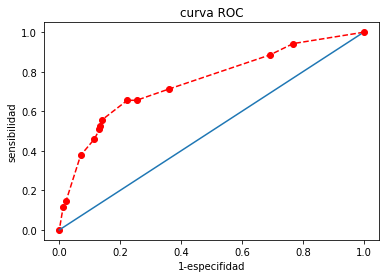

In [172]:
%matplotlib inline
plt.plot(especificities_1,sensitivities,marker='o',linestyle="--",color="r")
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-especifidad")
plt.ylabel("sensibilidad")
plt.title("curva ROC")

In [176]:
from sklearn import metrics


In [179]:
from ggplot  import *

In [180]:
prob

array([0.04850887, 0.1218693 , 0.06657898, ..., 0.30951584, 0.0175592 ,
       0.44390103])

In [182]:
espec_1, sensit,_ = metrics.roc_curve(y_test,prob)   ## esto realiza lo mismo pero para muchos thresholds

In [194]:
df = pd.DataFrame(
    {
        "esp": espec_1,
        "sens": sensit
    })

In [195]:
df.head()

,esp,sens
0,0.000000,0.000000
1,0.000000,0.008197
2,0.000000,0.024590
3,0.000000,0.040984
4,0.003591,0.040984


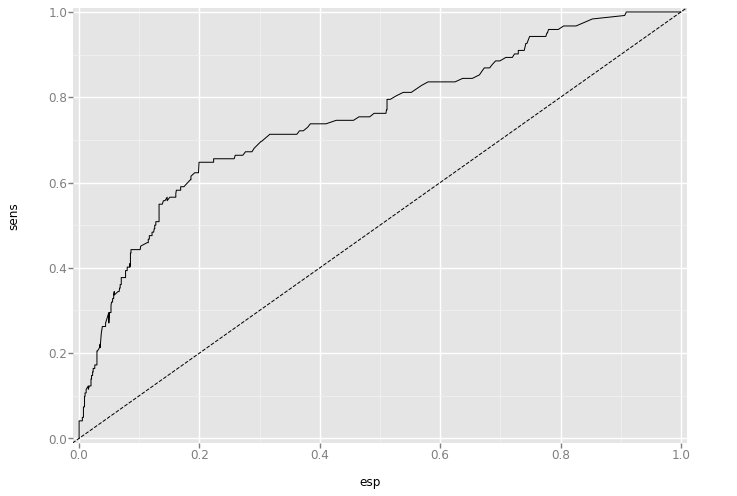

<ggplot: (8788846386225)>

In [196]:
ggplot(df,aes(x="esp",y="sens")) +geom_line() + geom_abline(linetype="dashed")+xlim(-0.01,1.01)+ylim(-0.01,1.01)

In [197]:
auc=metrics.auc(espec_1,sensit)   # area bajo la curva
auc

0.7519719221826531

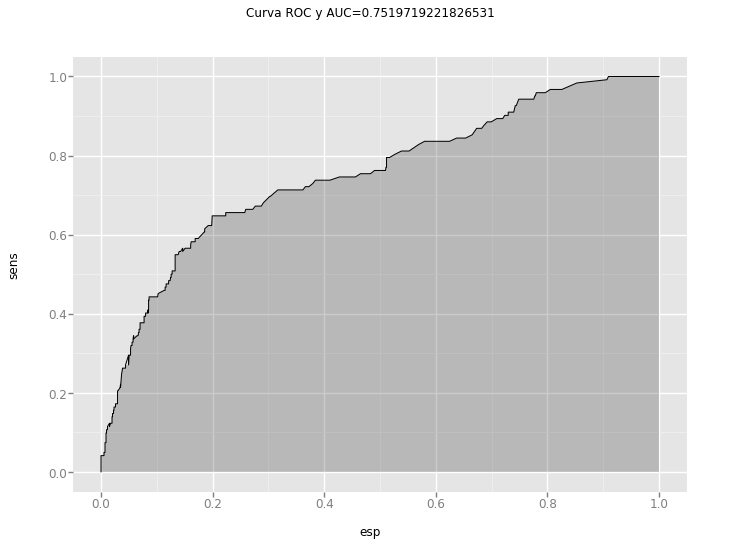

<ggplot: (8788849111625)>

In [199]:
ggplot(df,aes(x="esp", y="sens"))+geom_area(alpha=0.25)+geom_line(aes(y="sens"))+ggtitle("Curva ROC y AUC=%s" %str(auc))